# Homework 12: Classification

**Reading**: 

* [Classification](https://inferentialthinking.com/chapters/17/Classification.html)



Testing Hypotheses

This is the **last** of 12 homework assignments you'll complete in this course. The homework assignments provide you with more opportunity to practice the skills we've learned in lecture. This homework might include materials covered from the beginning of the course up to and including 12.2. This homework assignment is due by **11:59pm, December 9, 2021**.

Start early so that you can ask for assistance if you're stuck. If you remain stuck on a question, please reach out to me, or post your questions on the course Question Board in Canvas. Feel free to start a new thread for your question, or check there to see if someone else has done so already. I encourage everyone to participate by offering their own explanations, and I'll do the same. But be sure to refrain from directly posting or sharing answers. It's important for everyone to arrive at their own answers.

For all problems that you must write out explanations and sentences for, you must provide your answer in the designated space. Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use max_temperature in your anbswer to one question, do not reassign it later on. Moreover, please be sure to only put your written answers in the cells provided.

You will submit this assignment by uploading your completed Jupyter notebook to Canvas. All files will have a LASTNAME as part of their name. So before you continue, rename your file so that your last name replaces LASTNAME. Type your last name in ALL CAPS. For example, this downloaded file has the name
HW12-FA2021-LASTNAME.ipynb

If your last name is Peralta, change the file name to
HW12-FA2021-PERALTA.ipynb

Next, fill in the cell below with your student ID number replacing the ... Your cell should look like: IDs = [3141593]. Then click the "run cell" button at the top that looks like ▶| or hold down shift + return.
Please use the passcode basis for my office hours on Mondays and Wednesdays,10am-12pm and 8:45pm-9:45pm.


In [2]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)


In [ ]:
global IDs # leave this line alone
IDs = [...] # replace ... with your student ID number

## Iris classification


To practice k-nearest neighbor classification, we will work with a popular set of data of Iris Flowers, often known as Fisher's Iris data set (this copy was obtained from [Kaggle.com](https://www.kaggle.com/)).
 
 The original data set, loaded below as `iris.csv`, consists of 150 irises, all of 3 varieties: *Iris-setosa*, *iris-versicolor* or *iris-virginica*. To simplify the problem, we will classify with only two varieties.  In the cell below, we eliminate the first variety (*iris-setosa*).  We will predict which of the two remaining varieties an iris belongs to by using k-nearest neighbor classification and the numerical variables `SepalLengthCm` and `PetalLengthCm`.  



In [70]:
iris_full= Table.read_table("iris.csv")
iris=iris_full.where('Species', are.not_equal_to('Iris-setosa'))
iris=iris.select(1,3,5)
iris

SepalLengthCm,PetalLengthCm,Species
7,4.7,Iris-versicolor
6.4,4.5,Iris-versicolor
6.9,4.9,Iris-versicolor
5.5,4,Iris-versicolor
6.5,4.6,Iris-versicolor
5.7,4.5,Iris-versicolor
6.3,4.7,Iris-versicolor
4.9,3.3,Iris-versicolor
6.6,4.6,Iris-versicolor
5.2,3.9,Iris-versicolor


As usual, let's investigate our data visually before performing any kind of numerical analysis.

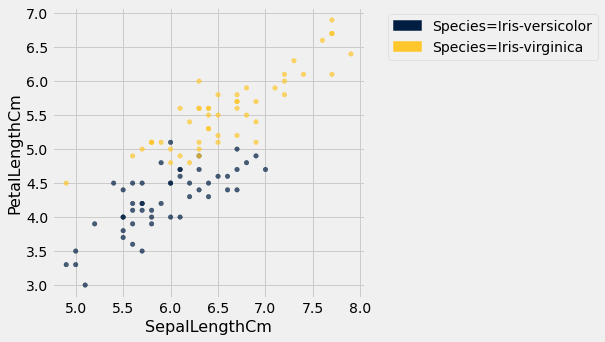

In [74]:
# Just run this cell!
iris.scatter("SepalLengthCm", "PetalLengthCm", group="Species")

#### Question 1

Let's begin implementing the k-Nearest Neighbors algorithm. Define the `distance` function, which takes in two arguments: an array of numerical features, and a different array of numerical features. The function should return the [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance) between the two arrays. Euclidean distance is often referred to as the straight-line distance formula that you may have learned previously.


<!--
BEGIN QUESTION
name: q1_1
manual: false
-->

In [67]:
def distance(arr1, arr2):
    return np.sqrt(...)

# Don't change/delete the code below in this cell
distance_example = distance(make_array(1, 2, 3), make_array(4, 5, 6))
distance_example

9.0

### Splitting the dataset
We'll do 2 different kinds of things with the `iris` dataset:
1. We'll build a classifier using coordinates for which we know the associated label; this will teach it to recognize labels of similar coordinate values. This process is known as *training*.
2. We'll evaluate or *test* the accuracy of the classifier we build on data we haven't seen before.

For reasons discussed in the textbook, we want to use separate datasets for these two purposes.  So we split up our one dataset into two.

#### Question 2

Next, let's split our dataset into a training set and a test set. Since `iris` has $100$ rows, let's create a training set with the first 75 rows and a test set with the remaining 25 rows. Remember that assignment to each group should be random, so we should shuffle the table first.

*Hint: as a first step we should shuffle all the rows, then use the* `tbl.take` *function to split up the rows for each table*


In [11]:
shuffled_table = iris.sample(...)
train = shuffled_table.take(...)
test = ...

print("Training set:\t",   train.num_rows, "examples")
print("Test set:\t",       test.num_rows, "examples")
train.show(5), test.show(5);

AttributeError: 'ellipsis' object has no attribute 'num_rows'

#### Question 3

Assign `features` to an array of the labels of the features from the `iris` table.

*Hint: which of the column labels in the `iris` table are the features, and which of the column labels correspond to the class we're trying to predict?*


In [13]:
features = ...
features

Ellipsis

#### Question 4

Now define the `classify` function. This function should take in a `row` from a table like `test` and classify it based on the data in `train` using the `k`-Nearest Neighbors based on the correct `features`.

*Hint: use the `row_to_array` function we defined for you below to convert rows to arrays of features so that you can use the `distance` function you defined earlier.*

*Hint 2: the code we provided iterates through each row in the training set.*


In [ ]:
def row_to_array(row, features):
    arr = make_array()
    for feature in features:
        arr = np.append(arr, row.item(feature))
    return arr

def classify(row, k, train):
    test_row_features_array = row_to_array(row, features)
    distances = make_array()
    for train_row in train.rows:
        train_row_features_array = row_to_array(..., ...)
        row_distance = distance(test_row_features_array, ...)
        distances = np.append(distances, ...)
    train_with_distances = train.with_column('Distances', ...)
    nearest_neighbors = train_with_distances.sort(...).take(np.arange(...))
    most_common_label = nearest_neighbors.group('Species').sort(..., ...).column(...).item(0)
    return most_common_label

# Don't modify/delete the code below
first_test = classify(test.row(0), 5, train)
first_test



#### Question 5

Define the function `three_classify` that takes a `row` from `test` as an argument and classifies the row based on using 3-Nearest Neighbors. Use this function to find the `accuracy` of a 3-NN classifier on the `test` set. `accuracy` should be a proportion (not a percentage) of the irises that were correctly predicted.

*Hint: you should be using a function you just created!*


In [ ]:
def three_classify(row):
    return classify(..., ..., ...)

test_with_prediction = test.with_column("prediction", test.apply(three_classify))
labels_correct = test_with_prediction.column(...)==test_with_prediction.column(...)
accuracy = np.count_nonzero(...)/...
accuracy

#### Question 6

Why do we divide our data into a training and test set? Should we use our test set to find the best possible number of neighbors for a k-NN classifer? What is the point of a test set, and why do we only want to use the test set once? Explain. 


*Write your answer here, replacing this text.*

#### Question 7

Why do we use an odd-numbered `k` in k-NN? Explain.



*Write your answer here, replacing this text.*

Our classifier can classify rows as belonging to one of two classes (or types of iris).

Congratulations - you're done with our last homework assignment!  Classification is one of the most important fields in statistics, data science, and machine learning. There are thousands of different classification algorithms and modifications of algorithms! There are many that you'll learn if you continue down the path of becoming a data scientist!